In [101]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [102]:
import pandas as pd

In [103]:
cbv = pd.read_table("CompactBitVector.tsv")

In [104]:
bench = pd.concat([
    pd.read_table("CompactBitVector.tsv"),
    pd.read_table("SucVector.tsv"),
    pd.read_table("RRR.tsv"),
    pd.read_table("LargeRRR.tsv")
])

In [113]:
bench.type = map(lambda s: s.split(".")[1], bench.type)

In [114]:
bench.head()

,type,length,r,bench_getindex,bench_rank1,bench_select1
0,CompactBitVector,1024,0.01,4.943555e-09,9.846680e-09,1.206426e-08
1,CompactBitVector,4096,0.01,5.238867e-09,8.166602e-09,1.242285e-08
2,CompactBitVector,16384,0.01,4.843652e-09,8.155273e-09,1.269644e-08
3,CompactBitVector,65536,0.01,4.839932e-09,8.147147e-09,1.285620e-08
4,CompactBitVector,262144,0.01,5.914162e-09,8.349210e-09,1.302696e-08


In [115]:
pd.options.display.max_rows = 1000

### Result

In [116]:
bench

,type,length,r,bench_getindex,bench_rank1,bench_select1
0,CompactBitVector,1024,0.01,4.943555e-09,9.846680e-09,1.206426e-08
1,CompactBitVector,4096,0.01,5.238867e-09,8.166602e-09,1.242285e-08
2,CompactBitVector,16384,0.01,4.843652e-09,8.155273e-09,1.269644e-08
3,CompactBitVector,65536,0.01,4.839932e-09,8.147147e-09,1.285620e-08
4,CompactBitVector,262144,0.01,5.914162e-09,8.349210e-09,1.302696e-08
5,CompactBitVector,1048576,0.01,4.879527e-09,9.032374e-09,1.429759e-08
6,CompactBitVector,4194304,0.01,4.978582e-09,8.365052e-09,1.328769e-08
7,CompactBitVector,16777216,0.01,5.056402e-09,8.698318e-09,1.423916e-08
8,CompactBitVector,1024,0.10,4.926563e-09,8.226367e-09,2.510234e-08
9,CompactBitVector,4096,0.10,4.858496e-09,8.168213e-09,2.614019e-08


In [107]:
figsize(12, 8)

In [118]:
bench[bench.r == 0.5]\
    .pivot(index="length", columns="type", values="bench_getindex")\
    [["CompactBitVector", "SucVector"]]

type,CompactBitVector,SucVector
length,,
1024,4.926953e-09,7.948437e-09
4096,4.858203e-09,7.877979e-09
16384,4.843591e-09,7.101526e-09
65536,8.377936e-09,7.399408e-09
262144,4.840186e-09,7.102268e-09
1048576,5.006271e-09,7.109838e-09
4194304,4.892480e-09,7.584386e-09
16777216,5.002259e-09,7.192976e-09


In [119]:
bench[bench.r == 0.5]\
    .pivot(index="length", columns="type", values="bench_rank1")\
    [["CompactBitVector", "SucVector"]]

type,CompactBitVector,SucVector
length,,
1024,8.226172e-09,9.621094e-09
4096,8.169873e-09,8.619531e-09
16384,8.155212e-09,1.227247e-08
65536,1.038565e-08,8.614291e-09
262144,8.237668e-09,1.031705e-08
1048576,8.165619e-09,8.622867e-09
4194304,8.687740e-09,8.832169e-09
16777216,8.974080e-09,9.005856e-09


In [120]:
def plot_bench(name, r):
    bench[bench.r == r]\
        .pivot(index="length", columns="type", values="bench_" + name)\
        .plot(style="o-")
    title("{} (r = {})".format(name, r))
    xscale("log", basex=2)
    ylabel("sec / op")
    ticklabel_format(style="scientific", axis="y", scilimits=(0,0))
    grid()

### dense

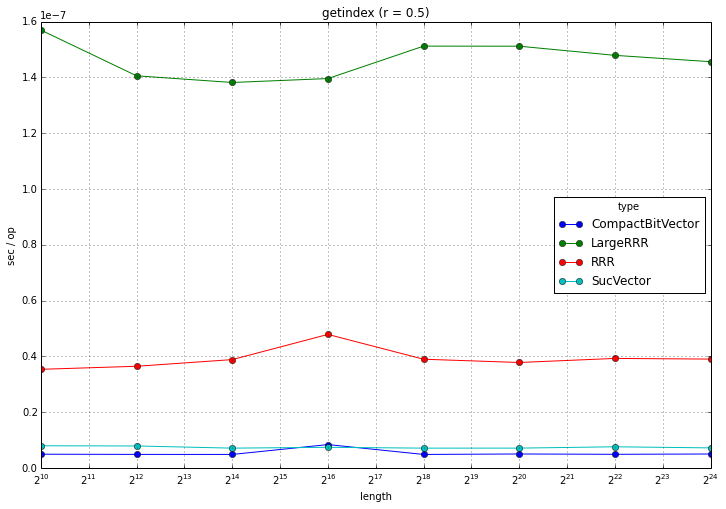

In [121]:
plot_bench("getindex", 0.5)

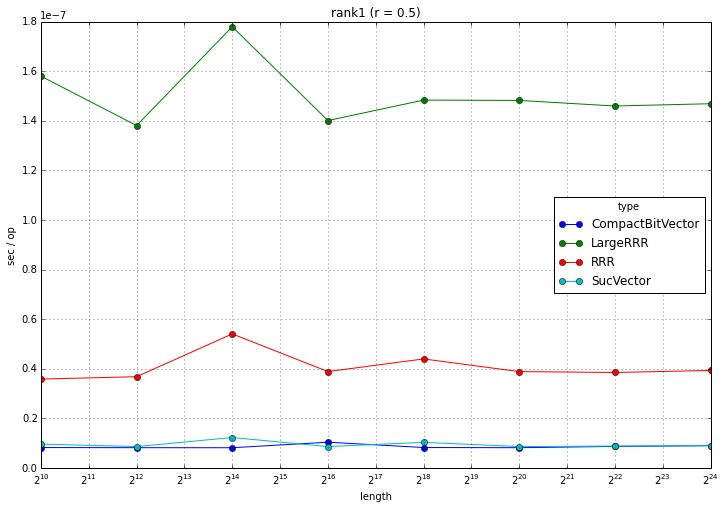

In [122]:
plot_bench("rank1", 0.5)

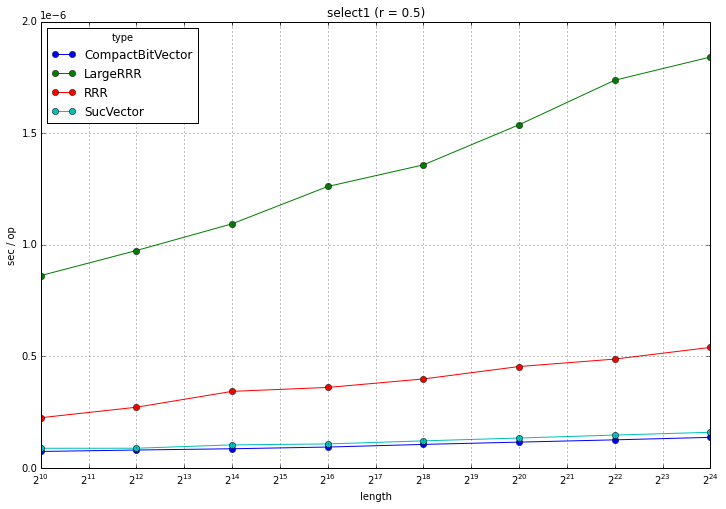

In [123]:
plot_bench("select1", 0.5)

### sparse

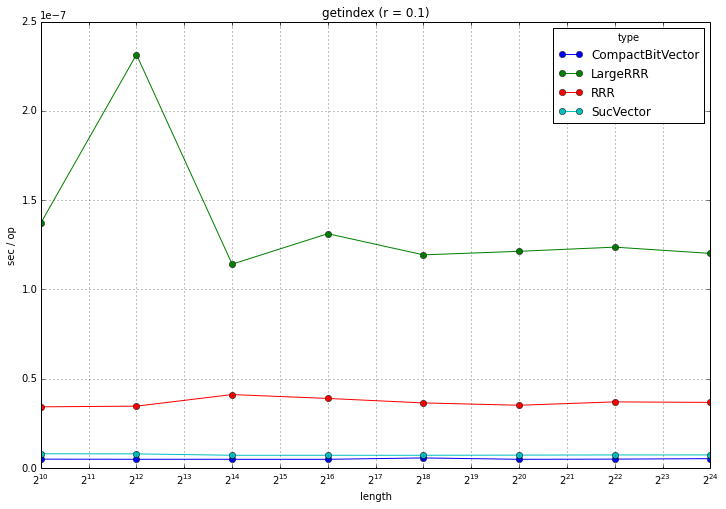

In [124]:
plot_bench("getindex", 0.1)

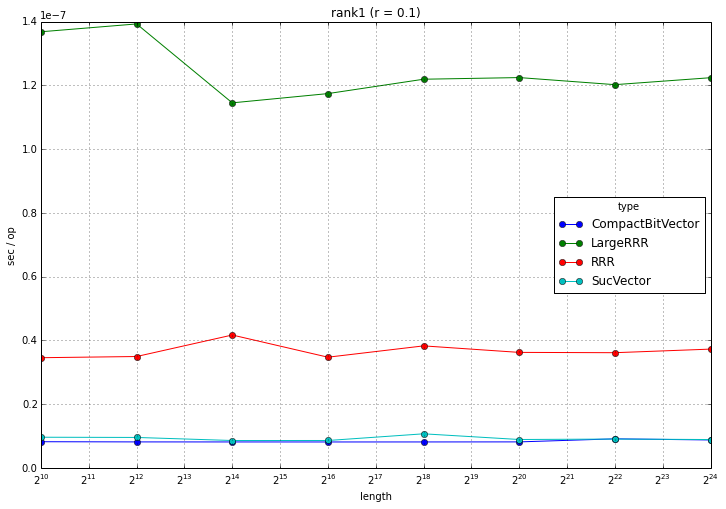

In [125]:
plot_bench("rank1", 0.1)

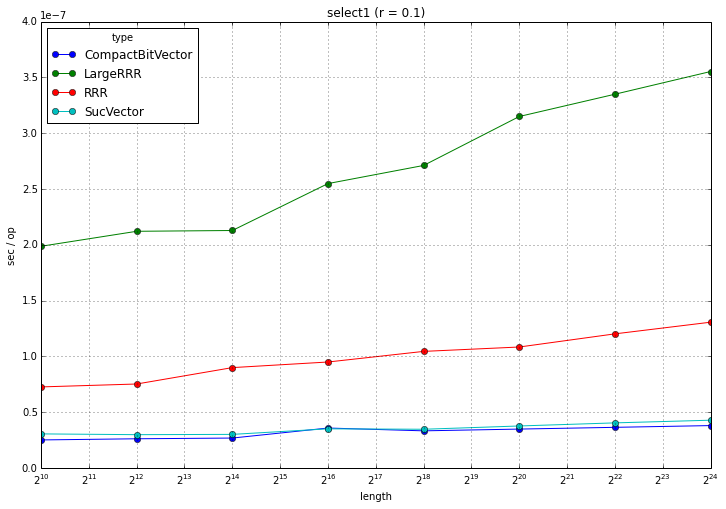

In [126]:
plot_bench("select1", 0.1)

### very sparse

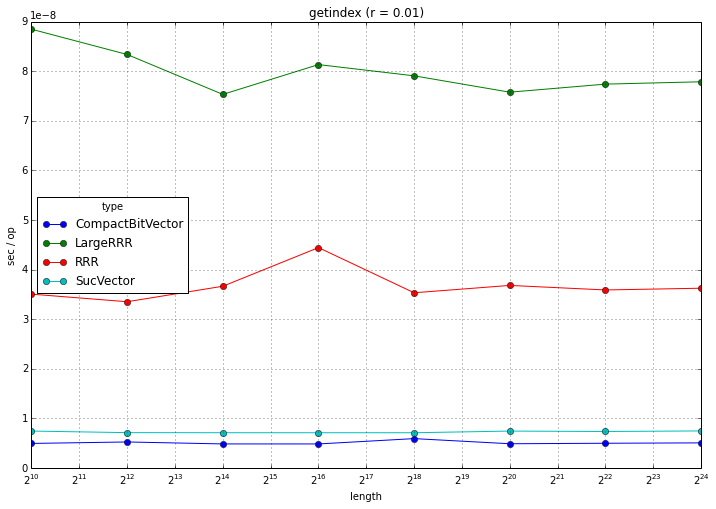

In [127]:
plot_bench("getindex", 0.01)

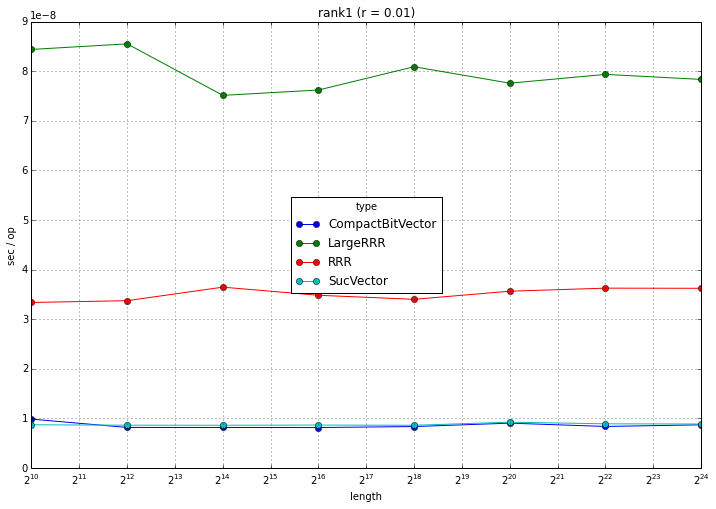

In [128]:
plot_bench("rank1", 0.01)

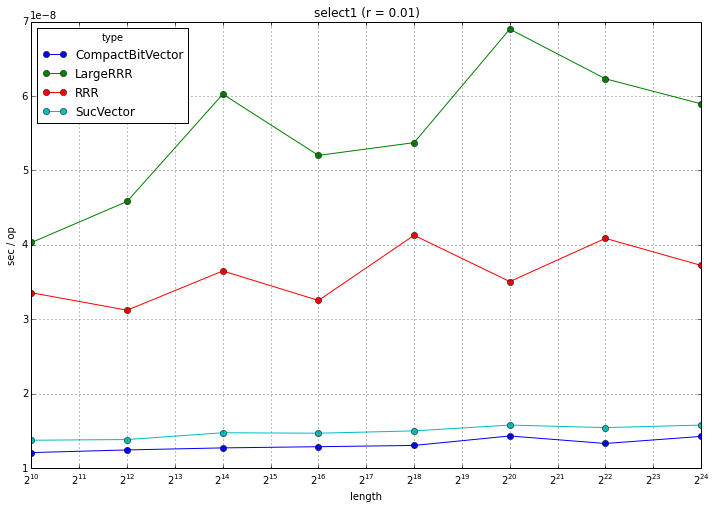

In [129]:
plot_bench("select1", 0.01)